In [38]:
from sklearn  import datasets

noisy_moon,_ = datasets.make_moons(n_samples=100, noise=0.05,random_state=10)
noisy_moon[:5]

array([[ 0.2554364 ,  0.90420806],
       [ 0.55299636,  0.84445141],
       [-0.90343862,  0.39161309],
       [-0.62792219,  0.62502915],
       [ 0.60777269, -0.33777687]])

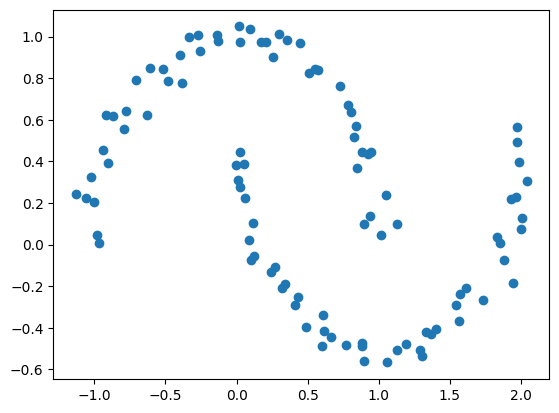

In [39]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.scatter(noisy_moon[:,0],noisy_moon[:,1])

Text(0.5, 1.0, 'Birch')

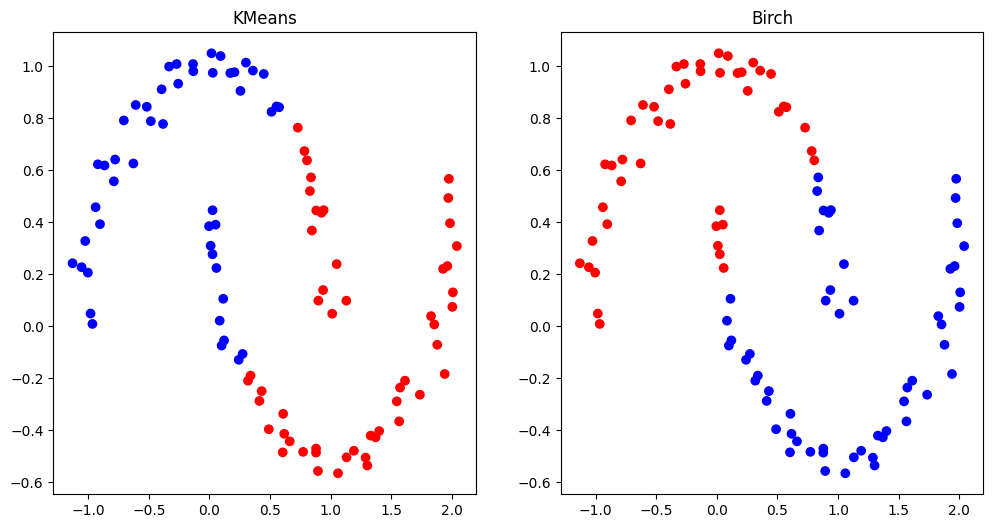

In [40]:
from sklearn.cluster import KMeans,Birch

kmeans = KMeans(n_clusters=2).fit_predict(noisy_moon)
birch = Birch(n_clusters=2).fit_predict(noisy_moon)

fig,axes = plt.subplots(1,2,figsize=(12,6))
axes[0].scatter(noisy_moon[:,0],noisy_moon[:,1],c=kmeans,cmap='bwr')
axes[0].set_title('KMeans')
axes[1].scatter(noisy_moon[:,0],noisy_moon[:,1],c=birch,cmap='bwr')
axes[1].set_title('Birch')


Use python implement DBSCAN

In [41]:
import numpy as np
def euc_dist(a,b):
    x = float(a[0]) - float(b[0])
    y = float(a[1]) - float(b[1])
    
    dist = round(np.sqrt(x*x + y*y),2)
    return dist

def search_neightbors(Data,P,eps):
    neighbors = []
    for i in range(len(Data)):
        if euc_dist(Data[i],Data[P]) < eps:
            neighbors.append(i)
    return neighbors

def dbscan_cluster(D,eps,MinPts):
    '''
    Parameters:
    D: Dataset(2D Array)
    eps: Epsilon
    MinPts: Minimum number of points
    
    return: 
    labels: Clustered Data
    '''
    labels = [0]*len(D)
    C = 0
    
    for P in range(len(D)):
        if not (labels[P] == 0):
            continue
        
        NeighborPts = search_neightbors(D,P,eps)
        
        #mark noise point as -1
        if len(NeighborPts) < MinPts:
            labels[P] = -1
        #If not noise point,create new cluster 
        else:
            C += 1
            labels[P] = C#Assign a New label to non noise point
            
            for i,n in enumerate(NeighborPts):
                Pn = NeighborPts[i]
                #P's neighbors , set it as same cluster
                if labels[Pn] == 0:
                    labels[Pn] = C
                    
                    PnNeighborPts = search_neightbors(D,Pn,eps)
                    if len(PnNeighborPts) >= MinPts:#Link them if it satisfies MinPts
                        NeighborPts += PnNeighborPts
                #If Pn was marked as noise point, set it as same cluster
                elif labels[Pn] == -1:
                    labels[Pn] = C
    return labels
            
    

In [42]:
dbscan_clu = dbscan_cluster(noisy_moon,eps=0.5,MinPts=5)
np.array(dbscan_clu)

array([1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2,
       2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1,
       2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1,
       1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1])

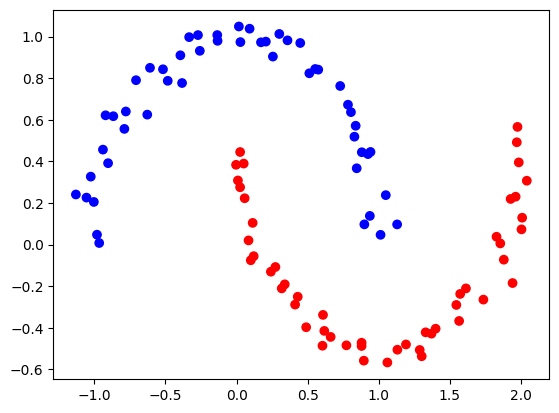

In [43]:
plt.scatter(noisy_moon[:,0],noisy_moon[:,1],c=dbscan_clu,cmap='bwr')

In [62]:
from sklearn.cluster import DBSCAN



dbscan_sk = DBSCAN(eps=0.5, min_samples=5, metric="euclidean")
dbscan_sk_c = dbscan_sk.fit_predict(noisy_moon)
dbscan_sk_c

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0])

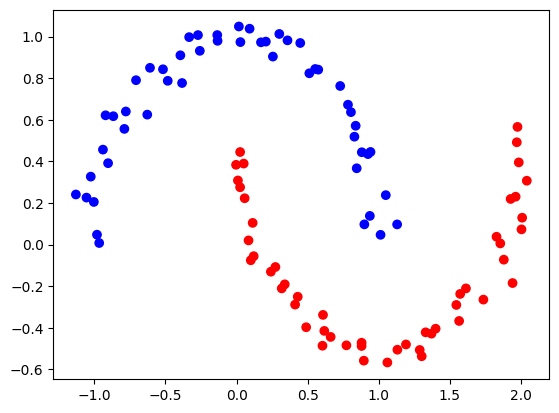

In [63]:
plt.scatter(noisy_moon[:,0],noisy_moon[:,1],c=dbscan_scikit_c,cmap='bwr')

HDBSCAN(Density-Based Clustering Based on Hierarchical Density Estimates)

Cons of DBSCAN: Parameter sensitivity
        -unstable when the eps value is not appropriate

HDBSCAN use hirerachical clustering to combine the origin clusters of DBSCAN, which could decrease the sensitiveness of cluster result to input paramaeters.

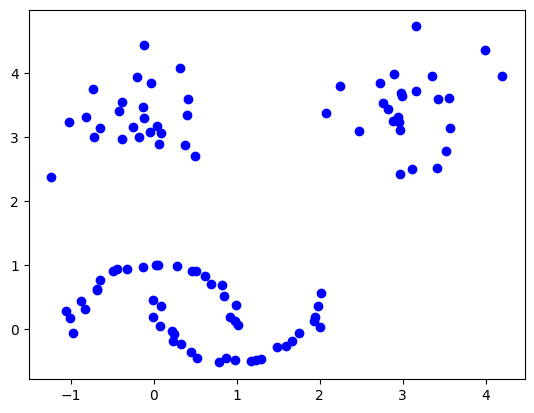

In [60]:
moons,_ = datasets.make_moons(n_samples=50,noise=0.05,random_state=10)
blobs, _ = datasets.make_blobs(
    n_samples=50, centers=[(-0.25, 3.25), (3, 3.5)], cluster_std=0.5, random_state=10
)

noisy_moons_blobs = np.vstack([moons, blobs])
plt.scatter(noisy_moons_blobs[:, 0], noisy_moons_blobs[:, 1], color="b")

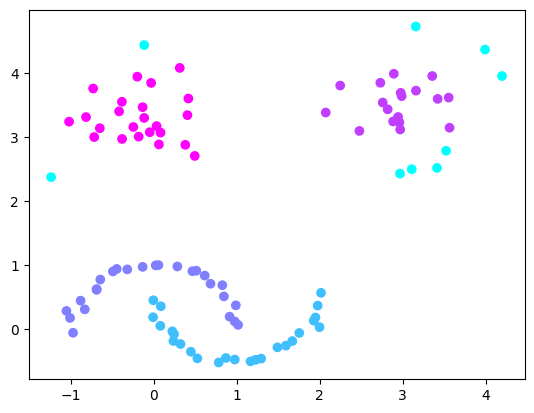

In [67]:
dbscan_sk_c = dbscan_sk.fit_predict(noisy_moons_blobs)
plt.scatter(
    noisy_moons_blobs[:, 0], noisy_moons_blobs[:, 1], c=dbscan_sk_c, cmap="cool"
)

It is more appropriate to have 3 clusters

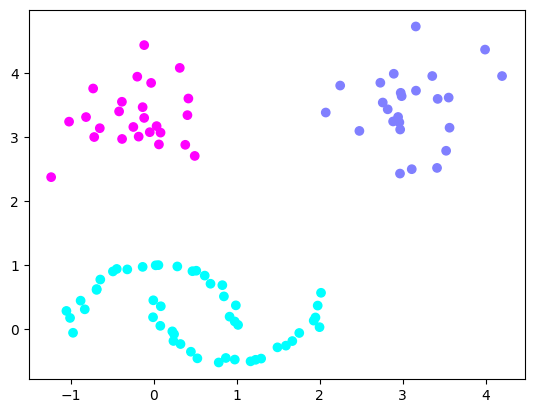

In [68]:
dbscan_sk = DBSCAN(eps=1, min_samples=5)
dbscan_sk_c = dbscan_sk.fit_predict(noisy_moons_blobs)
plt.scatter(
    noisy_moons_blobs[:, 0], noisy_moons_blobs[:, 1], c=dbscan_sk_c, cmap="cool"
)


c:\Python312\Lib\site-packages\hdbscan\plots.py:448: SyntaxWarning: invalid escape sequence '\l'
  axis.set_ylabel('$\lambda$ value')
c:\Python312\Lib\site-packages\hdbscan\robust_single_linkage_.py:154: SyntaxWarning: invalid escape sequence '\{'
  """Perform robust single linkage clustering from a vector array


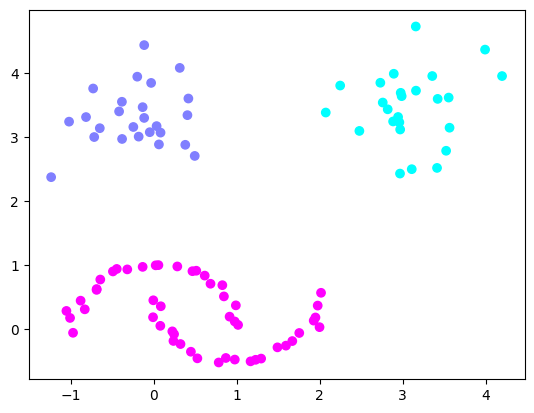

In [69]:
import hdbscan

hdbscan_t = hdbscan.HDBSCAN(gen_min_span_tree=True)
hdbscan_c = hdbscan_t.fit_predict(noisy_moons_blobs)

plt.scatter(noisy_moons_blobs[:,0],noisy_moons_blobs[:,1],c=hdbscan_c,cmap='cool')

HDBSCAN
$$
$$
Some basic concepts:
Core distance:
$$
\text{core}_{k}(x) = d(x, N^k(x))
$$


mutual reach distance:
$$
\text{d}_{mreach-k}(x, y) = \max\left(\text{core}_{k}(x), \text{core}_{k}(y), d(x, y)\right)
$$


Draw a weighted map based on the points and mutal reach distance

Use minimum spinning tree(Prim/Boruvka) to build a sub tree when clustering the dataset

<Axes: >

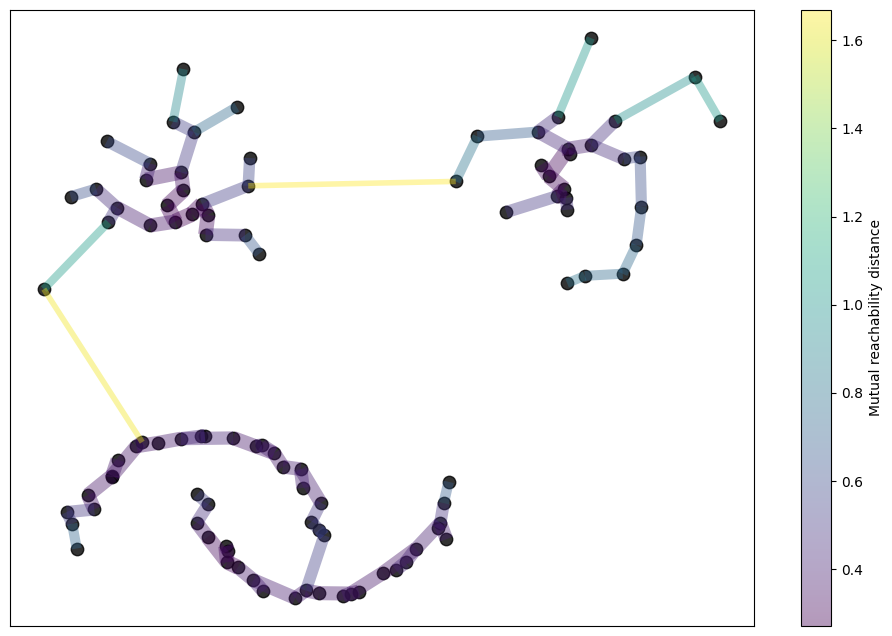

In [79]:
plt.figure(figsize=(12, 8))
hdbscan_t.minimum_spanning_tree_.plot(
    edge_cmap="viridis", edge_alpha=0.4, node_size=80, edge_linewidth=4
)

<Axes: ylabel='distance'>

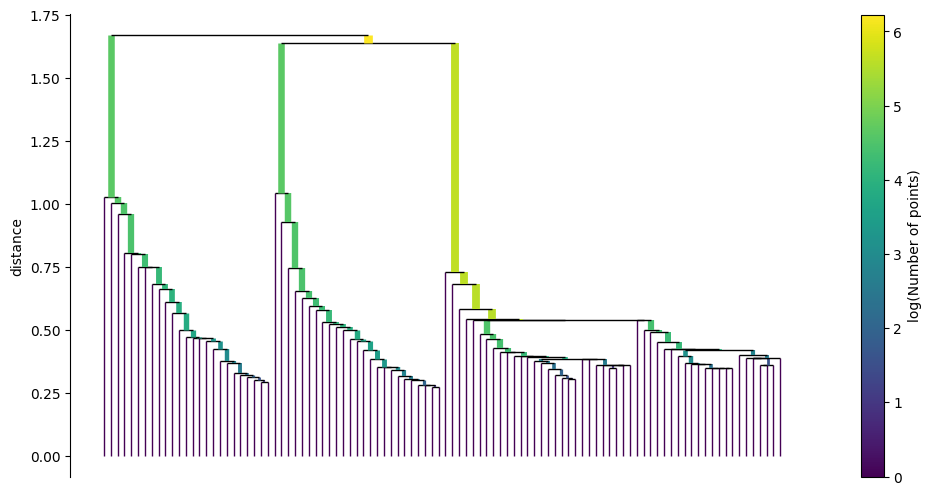

In [80]:
plt.figure(figsize=(12, 6))
hdbscan_t.single_linkage_tree_.plot(cmap="viridis", colorbar=True)

After compressed the hierarchical binary tree

<Axes: ylabel='$\\lambda$ value'>

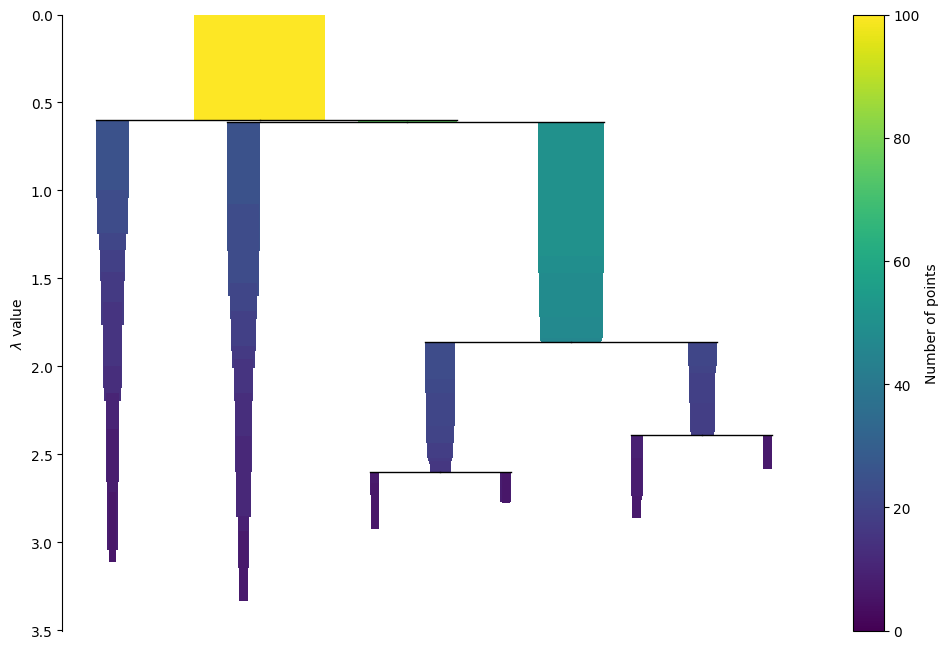

In [81]:
plt.figure(figsize=(12, 8))
hdbscan_t.condensed_tree_.plot()

<Axes: ylabel='$\\lambda$ value'>

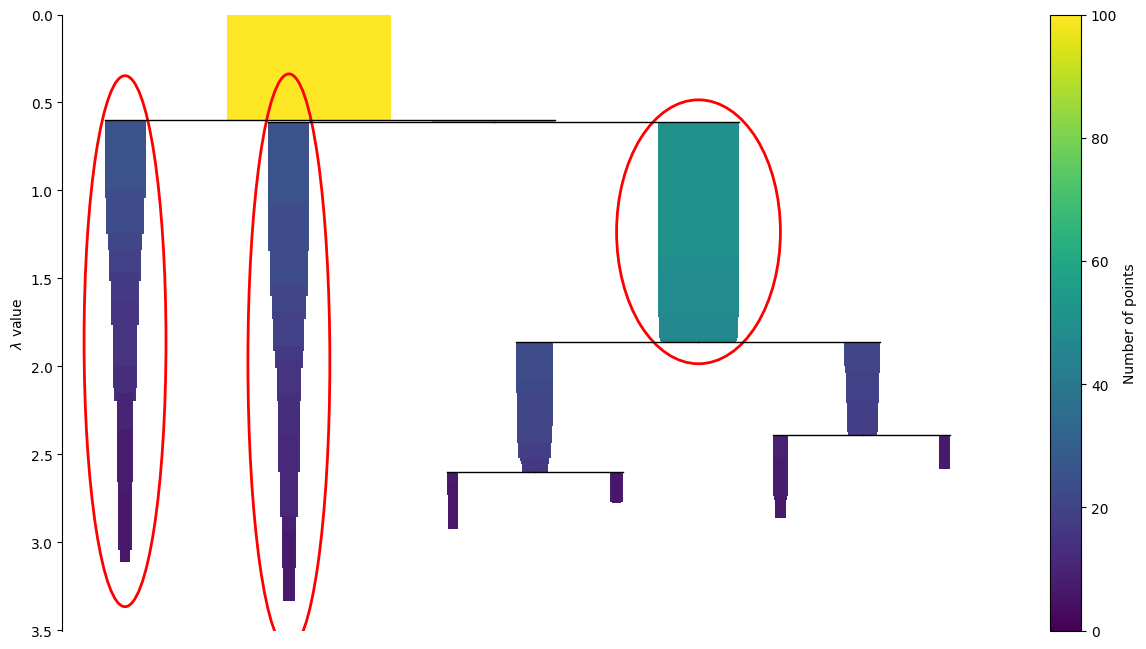

In [82]:
plt.figure(figsize=(15, 8))
hdbscan_t.condensed_tree_.plot(select_clusters=True)